In [1]:
import pandas as pd # panel data manipulation toolboox
import config # gitignored file with API keys
import json # library to handle JSON files
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#import matplotlib.cm as cm
#import matplotlib.colors as colors
import folium 
%matplotlib inline

In [2]:
df_all_prices = pd.read_csv('recent_prices.csv')

In [8]:
df_all_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,...,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,236331.0,...,1267917.0,1261999.0,1259198.0,1251242.0,1250404.0,1247793.0,1246303.0,1244057.0,1242227.0,1238239.0
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,193567.0,...,403797.0,403892.0,403408.0,402401.0,401237.0,399958.0,399178.0,398884.0,399746.0,400971.0
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,...,1785091.0,1776485.0,1768934.0,1761998.0,1760581.0,1760117.0,1758551.0,1758158.0,1755565.0,1752209.0
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,NaN,...,258733.0,258632.0,258510.0,258455.0,258174.0,257708.0,257323.0,256577.0,256110.0,255884.0
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,207027.0,...,451102.0,451175.0,450671.0,449617.0,448808.0,447856.0,446926.0,446623.0,446797.0,447528.0


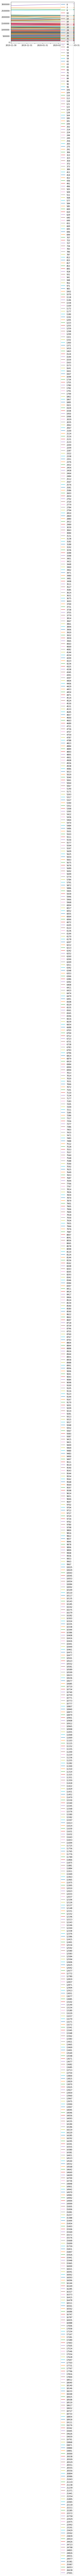

In [22]:
recent_times = ['2019-11-30', '2019-12-31', '2020-01-31','2020-02-29','2020-03-31']
df_nyc_prices = df_all_prices.loc[df_all_prices['Metro'] == 'New York-Newark-Jersey City']
df_nyc_prices[recent_times].T.plot()

In [23]:
address = 10309 #'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.554745, -74.221327.


In [22]:
df = pd.read_csv('prices.csv', index_col=0)
counties = ['New York', 'Kings', 'Bronx', 'Richmond', 'Queens']
df.loc[df.CountyName.isin(counties)]

,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
RegionID,,,,,,,,,,,,,,,,,,,,,
61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
61703,10128,New York,NY,New York,New York,14,NaN,NaN,NaN,NaN,...,1526000,1523700,1527200,1541600.0,1557800,1582900,1598900,1646100,1720500,1787100
61625,10011,New York,NY,New York,New York,15,NaN,NaN,NaN,NaN,...,2354000,2355500,2352200,2332100.0,2313300,2319600,2342100,2365900,2419700,2480400
61617,10003,New York,NY,New York,New York,21,NaN,NaN,NaN,NaN,...,1932800,1930400,1937500,1935100.0,1915700,1916500,1965700,2045300,2109100,2147000
62012,11201,New York,NY,New York,Kings,32,NaN,NaN,NaN,NaN,...,1340200,1338700,1350600,1375600.0,1390200,1398100,1399900,1400500,1407300,1420700
62044,11234,New York,NY,New York,Kings,52,NaN,NaN,NaN,NaN,...,448400,452300,457200,461200.0,464400,466400,470900,475700,477100,476900
61790,10314,New York,NY,New York,Richmond,68,123100.0,124000.0,123900.0,123300.0,...,322600,325000,326900,328800.0,332600,338600,344100,347800,352300,357300
62026,11215,New York,NY,New York,Kings,71,NaN,NaN,NaN,NaN,...,982200,992000,1002600,1021400.0,1039300,1040800,1035800,1050000,1066200,1070800


In [20]:
df.loc[df['State'] == 'NY'].groupby('Metro').count()

,RegionName,City,State,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
Metro,,,,,,,,,,,,,,,,,,,,,
Albany,46,46,46,46,46,41,41,41,41,41,...,46,46,46,46,46,46,46,46,46,46
Amsterdam,5,5,5,5,5,3,3,3,3,3,...,5,5,5,5,5,5,5,5,5,5
Auburn,8,8,8,8,8,5,5,5,5,5,...,8,8,8,8,8,8,8,8,8,8
Batavia,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
Binghamton,19,19,19,19,19,16,16,16,16,16,...,19,19,19,19,19,19,19,19,19,19
Buffalo,16,16,16,16,16,11,11,11,11,11,...,16,16,16,16,16,16,16,16,16,16
Corning,12,12,12,12,12,9,9,9,9,9,...,12,12,12,12,12,12,12,12,12,12
Cortland,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
Elmira,7,7,7,7,7,5,5,5,5,5,...,7,7,7,7,7,7,7,7,7,7


In [30]:
# NYC zipcodes
zips = pd.read_clipboard('\t')

In [31]:
zips

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,Bronx Park and Fordham,"10458, 10467, 10468",NaN
2,High Bridge and Morrisania,"10451, 10452, 10456",NaN
3,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474",NaN
4,Kingsbridge and Riverdale,"10463, 10471",NaN
5,Northeast Bronx,"10466, 10469, 10470, 10475",NaN
6,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473",NaN
7,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
8,Southwest Brooklyn,"11209, 11214, 11228",NaN
9,Borough Park,"11204, 11218, 11219, 11230",NaN
